In [2]:
df_raw = df.copy()


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    "id": [1, 2, 3, 3, 4, 5, 6],
    "edad": [25, -3, 30, 30, None, 150, 28],
    "ingresos": [20000, 25000, None, None, 18000, 1000000, 22000],
    "fecha_registro": ["2024-01-05", "2024/01/06", "error",
                       "2024-01-07", None, "2024-01-08", "2024-01-09"],
    "ciudad": ["CDMX", "GDL", "CDMX", "CDMX", None, "MTY", "MTY"]
}

df = pd.DataFrame(data)
df


,id,edad,ingresos,fecha_registro,ciudad
0,1,25.0,20000.0,2024-01-05,CDMX
1,2,-3.0,25000.0,2024/01/06,GDL
2,3,30.0,NaN,error,CDMX
3,3,30.0,NaN,2024-01-07,CDMX
4,4,NaN,18000.0,None,None
5,5,150.0,1000000.0,2024-01-08,MTY
6,6,28.0,22000.0,2024-01-09,MTY


In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              7 non-null      int64  
 1   edad            6 non-null      float64
 2   ingresos        5 non-null      float64
 3   fecha_registro  6 non-null      object 
 4   ciudad          6 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 412.0+ bytes


id                0
edad              1
ingresos          2
fecha_registro    1
ciudad            1
dtype: int64

In [6]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [7]:
df.duplicated().sum()
df=df.drop_duplicates()

Justification datos duplicados no generan nueva informacion 

In [8]:
df.loc[(df["edad"]<0)|(df["edad"]>100),"edad"]=np.nan

In [11]:
df["ingresos"].fillna (df["ingresos"].median(),inplace=True)



C:\Users\Hp 600\AppData\Local\Temp\ipykernel_31600\2375806856.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ingresos"].fillna (df["ingresos"].median(),inplace=True)


In [12]:
df["ciudad"].fillna("desconocido",inplace=True)

In [13]:
df["fecha_registro"]=pd.to_datetime(
    df["fecha_registro"],
    errors="coerce"
)

In [14]:
df=df.dropna(subset=["fecha_registro"])

In [15]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 6
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              4 non-null      int64         
 1   edad            3 non-null      float64       
 2   ingresos        4 non-null      float64       
 3   fecha_registro  4 non-null      datetime64[ns]
 4   ciudad          4 non-null      object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 192.0+ bytes


id                0
edad              1
ingresos          0
fecha_registro    0
ciudad            0
dtype: int64

## Limpieza de datos

- Se eliminaron registros duplicados.
- Se corrigieron edades fuera de rango y se imputaron con la mediana.
- Los ingresos nulos se imputaron con la mediana.
- Fechas inválidas se convirtieron a NaT y se eliminaron.
- Valores nulos en ciudad se marcaron como "Desconocido".


In [16]:
df

,id,edad,ingresos,fecha_registro,ciudad
0,1,25.0,20000.0,2024-01-05,CDMX
3,3,30.0,22000.0,2024-01-07,CDMX
5,5,NaN,1000000.0,2024-01-08,MTY
6,6,28.0,22000.0,2024-01-09,MTY


In [17]:
df["edad"].mean()


np.float64(27.666666666666668)

In [18]:
df.isna().sum()


id                0
edad              1
ingresos          0
fecha_registro    0
ciudad            0
dtype: int64

In [19]:
df["edad"] = pd.to_numeric(df["edad"], errors="coerce")


In [20]:
media_edad = df["edad"].mean()
media_edad


np.float64(27.666666666666668)

In [21]:
df["edad"] = df["edad"].fillna(media_edad)


In [22]:
df["edad"].isna().sum()


np.int64(0)

In [23]:
df.head()


,id,edad,ingresos,fecha_registro,ciudad
0,1,25.000000,20000.0,2024-01-05,CDMX
3,3,30.000000,22000.0,2024-01-07,CDMX
5,5,27.666667,1000000.0,2024-01-08,MTY
6,6,28.000000,22000.0,2024-01-09,MTY


In [24]:
df.describe()

,id,edad,ingresos,fecha_registro
count,4.000000,4.000000,4.000000,4
mean,3.750000,27.666667,266000.000000,2024-01-07 06:00:00
min,1.000000,25.000000,20000.000000,2024-01-05 00:00:00
25%,2.500000,27.000000,21500.000000,2024-01-06 12:00:00
50%,4.000000,27.833333,22000.000000,2024-01-07 12:00:00
75%,5.250000,28.500000,266500.000000,2024-01-08 06:00:00
max,6.000000,30.000000,1000000.000000,2024-01-09 00:00:00
std,2.217356,2.054805,489334.241598,NaN


In [25]:
df.groupby("ciudad")["ingresos"].describe()

,count,mean,std,min,25%,50%,75%,max
ciudad,,,,,,,,
CDMX,2.0,21000.0,1414.213562,20000.0,20500.0,21000.0,21500.0,22000.0
MTY,2.0,511000.0,691550.432000,22000.0,266500.0,511000.0,755500.0,1000000.0


In [26]:
df.groupby("ciudad")["ingresos"].mean().sort_values(ascending=False)


ciudad
MTY     511000.0
CDMX     21000.0
Name: ingresos, dtype: float64

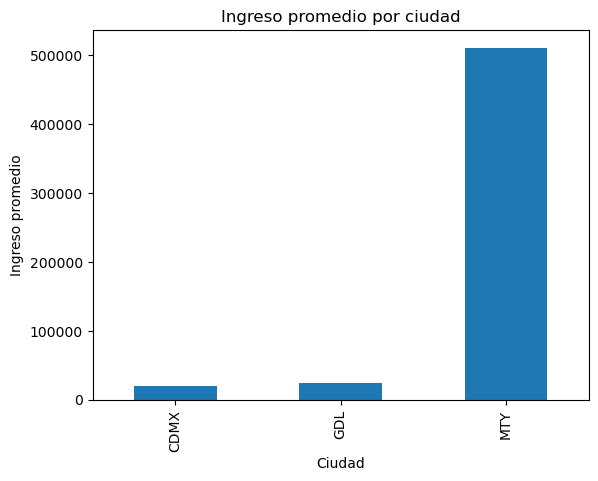

In [30]:
df.groupby("ciudad")["ingresos"].mean().plot(kind="bar")
plt.title("Ingreso promedio por ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Ingreso promedio")
plt.show()


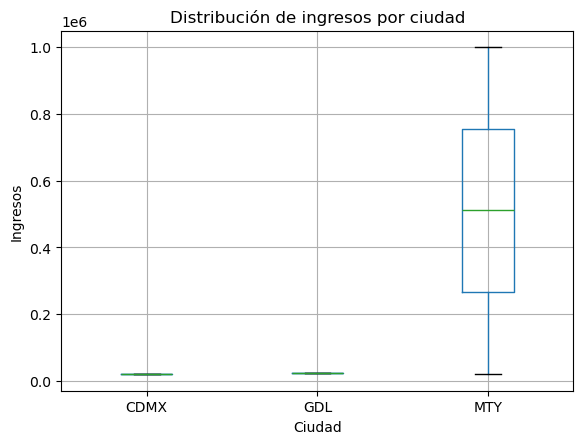

In [31]:
df.boxplot(column="ingresos", by="ciudad")
plt.title("Distribución de ingresos por ciudad")
plt.suptitle("")
plt.xlabel("Ciudad")
plt.ylabel("Ingresos")
plt.show()


### Ingresos por ciudad
Se analizó el ingreso promedio y su distribución por ciudad.
Se observaron diferencias entre ciudades, así como variabilidad
en los ingresos, con presencia de valores atípicos en algunos casos.
